## Group 25 
### Olof Sjögren, 3h 30min
### Romain Theodet, 3h 30min

# Question 1
## i.

In [1]:
import pandas as pd
import seaborn as sns
from sklearn import linear_model
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import numpy as np

# Table of area and price values, gathered manually from website.
table = pd.read_csv("./prices.csv")
table = table[["Area", "Price"]].dropna()

# Axises, x is area, y is price
x = np.array([ [elt] for elt in table["Area"] ])
y = table["Price"]

# Calculate linear regression model
model = LinearRegression().fit(x, y)

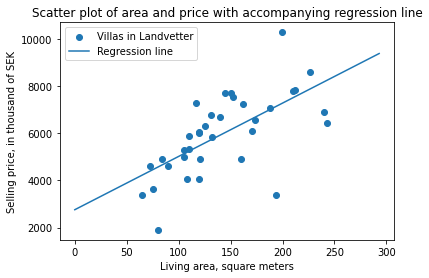

In [2]:
# Plotting the regression line and along with a scatter plot to visualize the model.
xfit = np.linspace(0, max(table["Area"]) + 50, 1000)
yfit = model.predict(xfit[:, np.newaxis])

plt.title("Scatter plot of area and price with accompanying regression line")
plt.xlabel("Living area, square meters")
plt.ylabel("Selling price, in thousand of SEK")
plt.scatter(x, y, label="Villas in Landvetter")
plt.plot(xfit, yfit, label="Regression line")
plt.legend()
plt.show()

In [3]:
# Calcualte the slope of the regression line as well as the interception point of the y-axis. 
slope     = model.coef_[0]
intercept = model.intercept_
print("Slope:", slope)
print("Intercept:", intercept)

Slope: 22.6518314034145
Intercept: 2758.776439888032


## ii.

In [4]:
# Prediction of the prices according to the linear regression model
print("Predicted price for 100 m²:", round(model.predict([[100]])[0]) * 1000, "SEK")
print("Predicted price for 150 m²:", round(model.predict([[150]])[0]) * 1000, "SEK")
print("Predicted price for 200 m²:", round(model.predict([[200]])[0]) * 1000, "SEK")


Predicted price for 100 m²: 5024000 SEK
Predicted price for 150 m²: 6157000 SEK
Predicted price for 200 m²: 7289000 SEK


## iii.


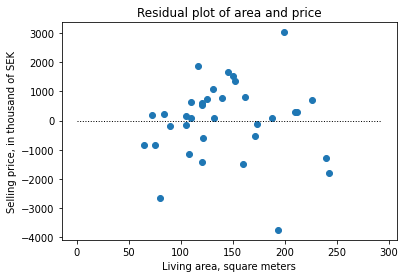

In [5]:
# Get all predict values by the model for each x-value
predictions = model.predict(x)
# Calculate the resuiduals as the difference between the predicted value and the actual value
residuals = y - predictions

# Horizontal dotted line
# x-scale, which spans from 0 to the maximum area (+ a small bias so it looks nicer)
xline = np.linspace(0, max(table["Area"]) + 50, 1000)
# y-scale, always equal to zero such that we get an horizontal line
yline = [ 0 for i in range(len(xfit)) ]

# Pyplot drawing
plt.title("Residual plot of area and price")
plt.xlabel("Living area, square meters")
plt.ylabel("Selling price, in thousand of SEK")
plt.scatter(x, residuals)
plt.plot(xline, yline, color="black", linestyle="dotted", linewidth=1)
plt.show()

## iv.

In [6]:
print("Coefficient of determination of the model:", model.score(x, y))

Coefficient of determination of the model: 0.416660447434515


The model is not very accurate although it could be worse. It has a correlation score of `0.41` which is clearly not very good considering the max is `1.00`. However it could be considerably worse. Usually though, a linear regression is said to be accurate and meaningful for coefficients above `0.8`n so this model isn't really good. This can also be seen by looking at the plotted graph along side the regression model. A look at the residual graph confirms this as the residual points there are very scattered and does not conform to the middle line, thus indicating a lot of inaccuracies.

There are however several ways to improve the model.
The first way is to simply gather more data points for a more accurate model. 
Another way is to include more dimensions in the model to account for more factors. These factors could also explain some of the outliers and points with high residuals. Right now the model only accounts for living area and price, however it's not unreasonable to think that factors such as the number of rooms, the non-liveable area, and the year the house was built could factor into the price.


# Question 2

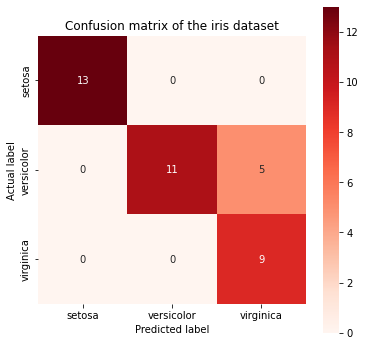

In [7]:
from sklearn.linear_model import LogisticRegression
# Contains iris data set
from sklearn import datasets

# Load iris dataset
iris = datasets.load_iris()

# Load training and test sets (using 25% test set and 75% learning set)
x_train, x_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.25, random_state=0)

# Make an instance of the model (one-vs-rest option)
logisticRegr = LogisticRegression(multi_class="ovr", solver="liblinear")

# Training the model on the data
logisticRegr.fit(x_train, y_train)

# Make predictions on entire test data
predictions = logisticRegr.predict(x_test)

# Generate the confusion matrix based on the predictions and the actual targets
cm = metrics.confusion_matrix(y_test, predictions)

labels = iris.target_names

plt.figure(figsize=(6, 6))
sns.heatmap(cm, annot=True, square=True, cmap="Reds", xticklabels=labels, yticklabels=labels)
plt.ylabel("Actual label")
plt.xlabel("Predicted label")
plt.title("Confusion matrix of the iris dataset")
plt.show()

The model seems pretty good at identifying the flowers with the exception of `versicolor` which it predicts as `virginica`. Interestingly enough the model has no problem identifying the other way around, i.e. it does not confuse the actual label `virginica` as the predicted label `versicolor`.

# Question 3

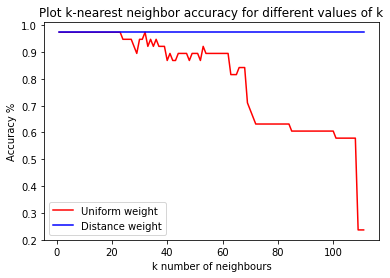

In [8]:
from sklearn.neighbors import KNeighborsClassifier


def getAccuracyList(weightMode):
    # Array of accuracy scores
    accuracyList = []

    for nb in range(1, len(x_train)):
        # Create KNN Classifier
        knn = KNeighborsClassifier(n_neighbors=nb, weights=weightMode)

        # Train the model using the training sets
        knn.fit(x_train, y_train)

        # Predict the response from test dataset
        y_pred = knn.predict(x_test)

        # Accuracy score
        accuracy = metrics.accuracy_score(y_test, y_pred)
        accuracyList.append(accuracy)
    
    return accuracyList

xs = list(range(1, len(x_train)))

plt.ylabel("Accuracy %")
plt.xlabel("k number of neighbours")
plt.title("Plot k-nearest neighbor accuracy for different values of k")
plt.plot(xs, getAccuracyList("uniform"), color="red", label="Uniform weight")
plt.plot(xs, getAccuracyList("distance"), color="blue", label="Distance weight")
plt.legend()
plt.show()

We decided to run one model using for distance weight and uniform weight each for each `k` between 0 - 100 and then plot the accuracies alongside each other. This way we can see how increasing the `k` value affects the accuracy of the model.

When `k` goes larger with an uniform weight, all points starts to influence the current point, which lowers the accuracy. At really high `k`s, when every point influences each other, we get a really low score since it only becomes noise and a simple "below or above average" metric. Since every point (or a larged majority) are considered neighbours, the model will guess that the label with the most data points since it has the highest probability if you consider all the points. Thus the uniform weight clearly looses accuracy at increasingly high `k`s.

However, for a distance weight, only the closest neighbors really matters, as the other nodes' weights doesn't count as much. Because of this, the accuracy stays good, since the difference between 20 and 100 points is only between 80 further points with a low weight. 

# Question 4

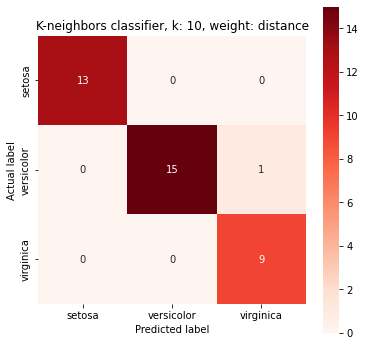

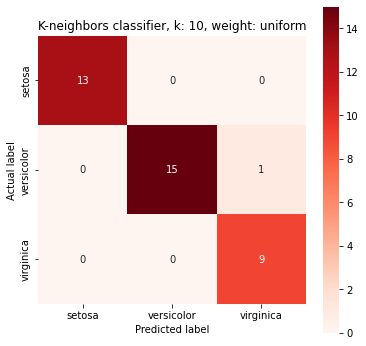

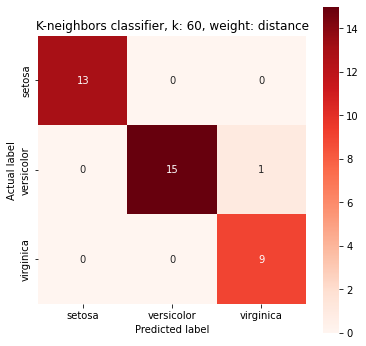

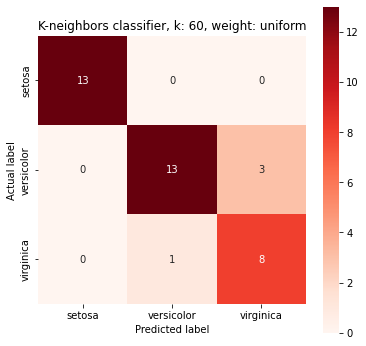

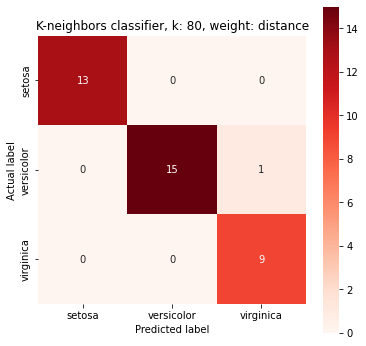

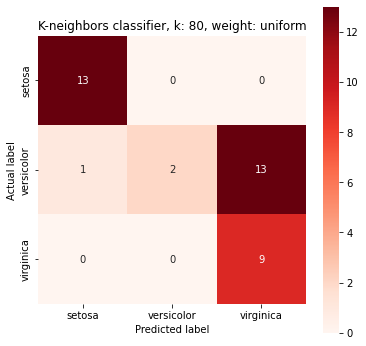

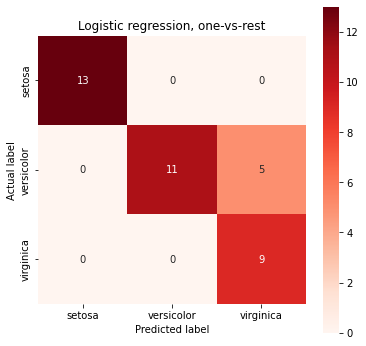

In [9]:
# ---------------------- k-neighbours, distance, k=10 ----------------------

model = KNeighborsClassifier(n_neighbors=10, weights="distance")
model.fit(x_train, y_train)
predictions = model.predict(x_test)
cm = metrics.confusion_matrix(y_test, predictions)

plt.figure(figsize=(6, 6))
sns.heatmap(cm, annot=True, square=True, cmap="Reds", xticklabels=labels, yticklabels=labels)
plt.ylabel("Actual label")
plt.xlabel("Predicted label")
plt.title("K-neighbors classifier, k: 10, weight: distance")
plt.show()


# ---------------------- k-neighbours, uniform, k=10 ----------------------

model = KNeighborsClassifier(n_neighbors=10, weights="uniform")
model.fit(x_train, y_train)
predictions = model.predict(x_test)
cm = metrics.confusion_matrix(y_test, predictions)

plt.figure(figsize=(6, 6))
sns.heatmap(cm, annot=True, square=True, cmap="Reds", xticklabels=labels, yticklabels=labels)
plt.ylabel("Actual label")
plt.xlabel("Predicted label")
plt.title("K-neighbors classifier, k: 10, weight: uniform")
plt.show()

# ---------------------- k-neighbours, distance, k=60 ----------------------

model = KNeighborsClassifier(n_neighbors=60, weights="distance")
model.fit(x_train, y_train)
predictions = model.predict(x_test)
cm = metrics.confusion_matrix(y_test, predictions)

plt.figure(figsize=(6, 6))
sns.heatmap(cm, annot=True, square=True, cmap="Reds", xticklabels=labels, yticklabels=labels)
plt.ylabel("Actual label")
plt.xlabel("Predicted label")
plt.title("K-neighbors classifier, k: 60, weight: distance")
plt.show()

# ---------------------- k-neighbours, uniform, k=60 ----------------------

model = KNeighborsClassifier(n_neighbors=60, weights="uniform")
model.fit(x_train, y_train)
predictions = model.predict(x_test)
cm = metrics.confusion_matrix(y_test, predictions)

plt.figure(figsize=(6, 6))
sns.heatmap(cm, annot=True, square=True, cmap="Reds", xticklabels=labels, yticklabels=labels)
plt.ylabel("Actual label")
plt.xlabel("Predicted label")
plt.title("K-neighbors classifier, k: 60, weight: uniform")
plt.show()

# ---------------------- k-neighbours, distance, k=80 ----------------------

model = KNeighborsClassifier(n_neighbors=80, weights="distance")
model.fit(x_train, y_train)
predictions = model.predict(x_test)
cm = metrics.confusion_matrix(y_test, predictions)

plt.figure(figsize=(6, 6))
sns.heatmap(cm, annot=True, square=True, cmap="Reds", xticklabels=labels, yticklabels=labels)
plt.ylabel("Actual label")
plt.xlabel("Predicted label")
plt.title("K-neighbors classifier, k: 80, weight: distance")
plt.show()

# ---------------------- k-neighbours, uniform, k=80 ----------------------

model = KNeighborsClassifier(n_neighbors=80, weights="uniform")
model.fit(x_train, y_train)
predictions = model.predict(x_test)
cm = metrics.confusion_matrix(y_test, predictions)

plt.figure(figsize=(6, 6))
sns.heatmap(cm, annot=True, square=True, cmap="Reds", xticklabels=labels, yticklabels=labels)
plt.ylabel("Actual label")
plt.xlabel("Predicted label")
plt.title("K-neighbors classifier, k: 80, weight: uniform")
plt.show()

# ---------------------- logistic regression, one-vs-rest ----------------------

model = LogisticRegression(multi_class="ovr", solver="liblinear")
model.fit(x_train, y_train)
predictions = model.predict(x_test)
cm = metrics.confusion_matrix(y_test, predictions)

plt.figure(figsize=(6, 6))
sns.heatmap(cm, annot=True, square=True, cmap="Reds", xticklabels=labels, yticklabels=labels)
plt.ylabel("Actual label")
plt.xlabel("Predicted label")
plt.title("Logistic regression, one-vs-rest")
plt.show()

On a performance point of view, we can clearly see that K-neighbors with a uniform weight is bad as the `k` number of neighbours increases. At a low level of `k` number of neighbours the result is accurate but the accuracy falls as the number of neighbours increases. This can also be seen in the result from `Question 3`. However K-neighbours using a distance weight shows high accuracy, even for increasing number of neighoburs. This is also visualized in the result from `Question 3`. Thus the K-neighbours using a distance weight is more reliable for this data set with varying number of `k` neighbours.

Between the logistic regression (one-vs-rest) and the K-neighbors with a distance weight, the second one is better as the `versicolor` are classified more accurately.

Note however the performance of the classification models are for this specifc data set and will vary between data sets. The performance depends on the different structures and clusters of the data sets. So it is important to point out that the performance for this data set should not be considered universal for all data sets.

# Question 5

It is important to use different datasets for training, test and even validation, because of overfitting and underfitting. Without different datasets, we would ultimately find a model with an accuracy of 100% on its own training set but completely out of touch with the reality because of the overfitting.

For example, with the model we had in `Question 1`, we could completely find a really complex model which passes by all points, thus having a 100% accuracy score. However, it seems unreasonable to find such model ; our data is inherently noisy, and no model will be able to achieve 100% accuracy.

So by dividing the data set into a test set and a training set we are able to get an initial verification that the model is accurately prediciting the rest of the set, and that the model is not just specifically tailored to the test set but able to accurately predict new values for new data points not contained in the training set. And the test set has the advantage that we know the "correct" value before hand and can thus make a statement about the accuracy. If we were to simply train the model on the whole set, it might very well return new values when we feed the machine with new data points however we have no way to actually know if the model is making accurate preditctions since we have know knowledge of what the "correct" values are for the new points. 

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=ab83f1d1-4f39-4251-b899-1ad25d544179' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>